In [ ]:
!rm 'data_utils.py'

rm: cannot remove 'data_utils.py': No such file or directory


In [57]:
!ls

data_utils.py  sample_data  train_batch_1  train_batch_3  train_batch_5
__pycache__    test_batch   train_batch_2  train_batch_4


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data_utils.py to data_utils.py
Saving test_batch to test_batch
Saving train_batch_1 to train_batch_1
Saving train_batch_2 to train_batch_2
Saving train_batch_3 to train_batch_3
Saving train_batch_4 to train_batch_4
Saving train_batch_5 to train_batch_5


In [110]:
import numpy as np
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

## CIFAR-10 Data Loading and Preprocessing

In [111]:
# Load the raw CIFAR-10 data.
cifar10_dir = './'

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


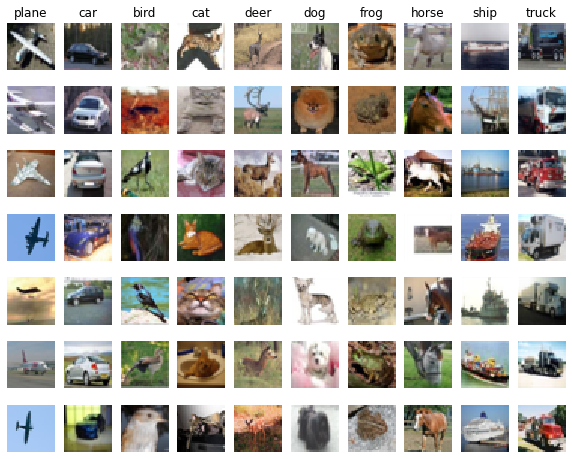

In [112]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [113]:
# Split the data into train, val, and test sets.
num_training = 49000
num_validation = 1000
num_test = 1000 #10000

# Our validation set will be num_validation points from the original training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We use the first num_test points of the original test set as our test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [ ]:
# Preprocessing: subtract the mean image
# first: compute the image mean based on the training data
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) # print a few of the elements
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) # visualize the mean image
plt.show()

### Additional steps
Make only if needed

In [115]:
X_train /= 255
X_val /= 255
X_test /= 255

In [116]:
# second: subtract the mean image from train and test data
X1_train = X_train - mean_image/255
X1_val = X_val - mean_image/255
X1_test = X_test - mean_image/255

In [122]:
print(X_train[0,0,:5])
print('-------------------------')
print(X1_train[0,0,:5])

[[0.23137255 0.24313725 0.24705882]
 [0.16862745 0.18039216 0.17647059]
 [0.19607843 0.18823529 0.16862745]
 [0.26666667 0.21176471 0.16470588]
 [0.38431373 0.28627451 0.20392157]]
-------------------------
[[-0.28094862 -0.29012445 -0.27244674]
 [-0.34139488 -0.35038447 -0.34021184]
 [-0.31749236 -0.34565994 -0.35088772]
 [-0.2489595  -0.32386443 -0.35601152]
 [-0.13370196 -0.25152973 -0.31834118]]


In [123]:
y_train

array([6, 9, 9, ..., 4, 9, 3])

In [124]:
from tensorflow.keras import utils
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
y_val = utils.to_categorical(y_val)

In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling2D, Dropout, Flatten 

CNN model

In [149]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (32,32,3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [150]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        2432      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 64)        

In [151]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
сheckpoint = ModelCheckpoint('mnist-cnn.h5', 
                              monitor='val_accuracy', 
                              save_best_only=True,
                              verbose=1)

In [152]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [142]:
print(y_train.shape)
print(y_val.shape)
print(X_val.shape)
print(X_train.shape)

(49000, 10)
(1000, 10)
(1000, 32, 32, 3)
(49000, 32, 32, 3)


In [153]:
batch_size = 96

In [ ]:
history = model.fit(X_train,y_train, batch_size = batch_size, 
                    epochs=30,
                    validation_data=(X_val, y_val),
                    steps_per_epoch=X_train.shape[0]//batch_size,
                    verbose=1,
                    callbacks=[сheckpoint, learning_rate_reduction])

In [145]:
model.load_weights('mnist-cnn.h5')

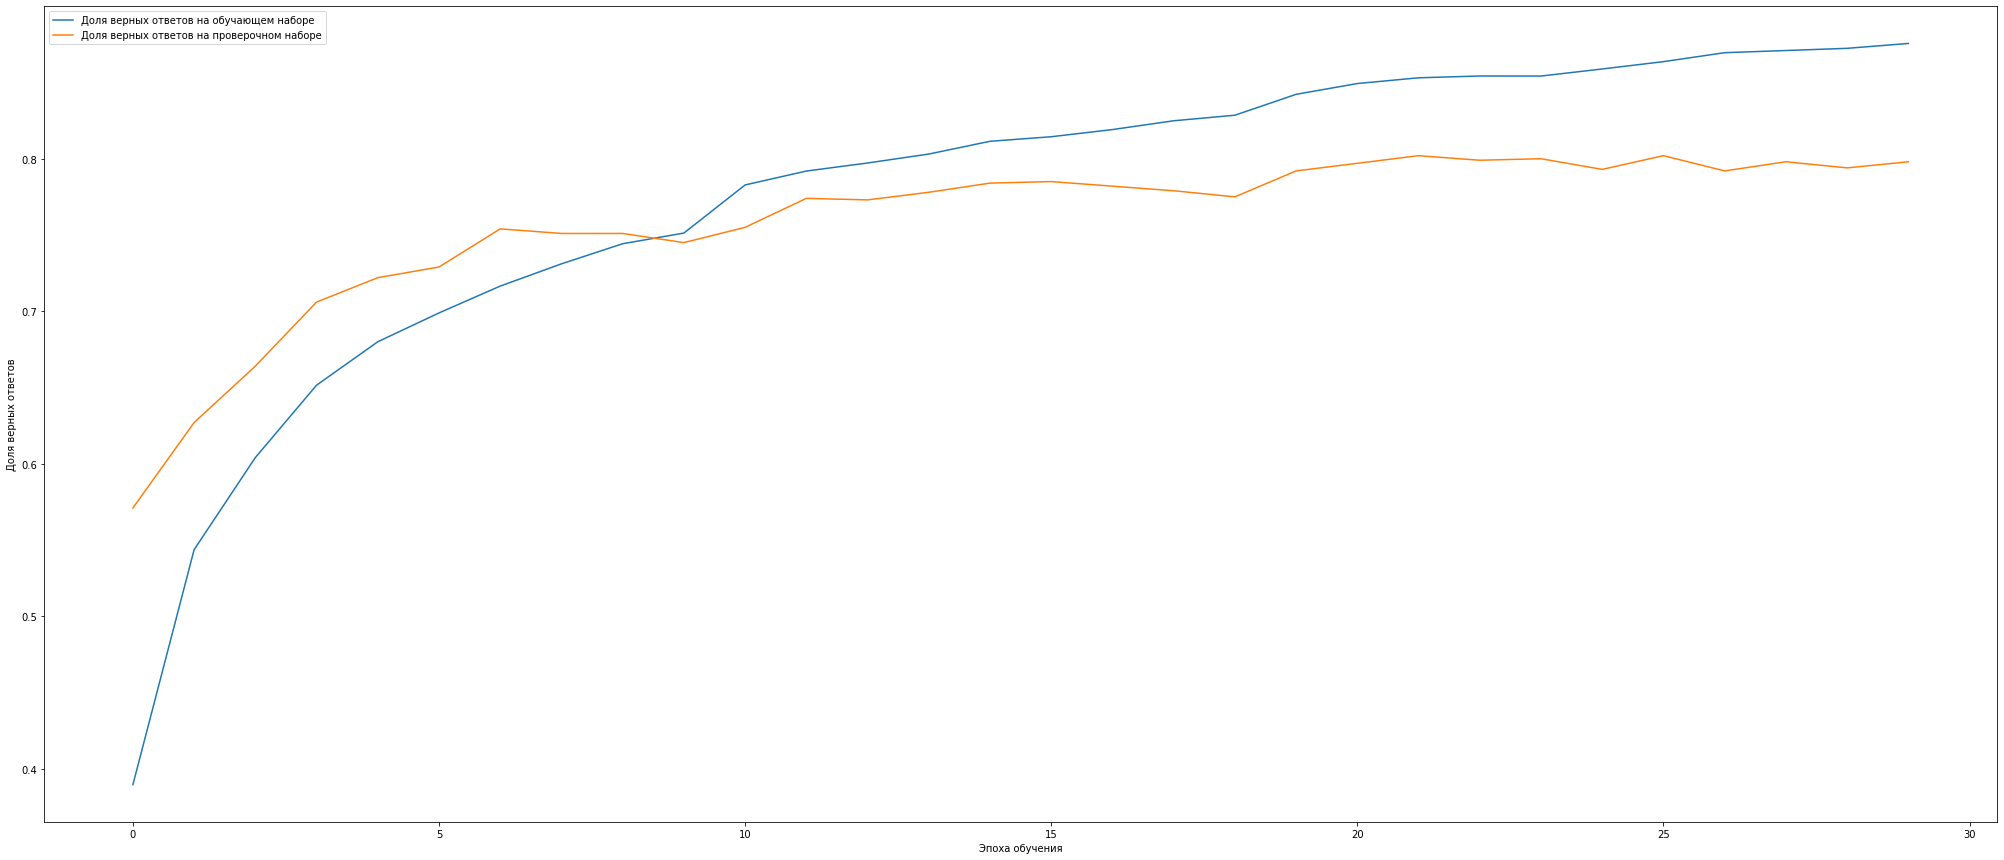

In [161]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.rcParams["figure.figsize"] = (35,15)
plt.legend()
plt.show()

In [147]:
model.evaluate(X_test, y_test, verbose=1)

32/32 [==============================] - 0s 6ms/step - loss: 0.6520 - accuracy: 0.7930


[0.6520184874534607, 0.7929999828338623]

In [148]:
from sklearn.metrics import classification_report
pred = model.predict(X_test, batch_size = 32)
pred = np.argmax(pred, axis=1)
answer_y_test = np.argmax(y_test, axis=1)
print(classification_report(answer_y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.75      0.78       103
           1       0.93      0.90      0.91        89
           2       0.79      0.67      0.72       100
           3       0.62      0.67      0.64       103
           4       0.73      0.80      0.77        90
           5       0.66      0.63      0.64        86
           6       0.78      0.87      0.82       112
           7       0.89      0.82      0.86       102
           8       0.88      0.92      0.90       106
           9       0.85      0.88      0.86       109

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.80      0.79      0.79      1000



In [ ]:
history1 = model.fit(X1_train,y_train, batch_size = batch_size, 
                    epochs=30,
                    validation_data=(X1_val, y_val),
                    steps_per_epoch=X1_train.shape[0]//batch_size,
                    verbose=1,
                    callbacks=[сheckpoint, learning_rate_reduction])

In [155]:
model.load_weights('mnist-cnn.h5')

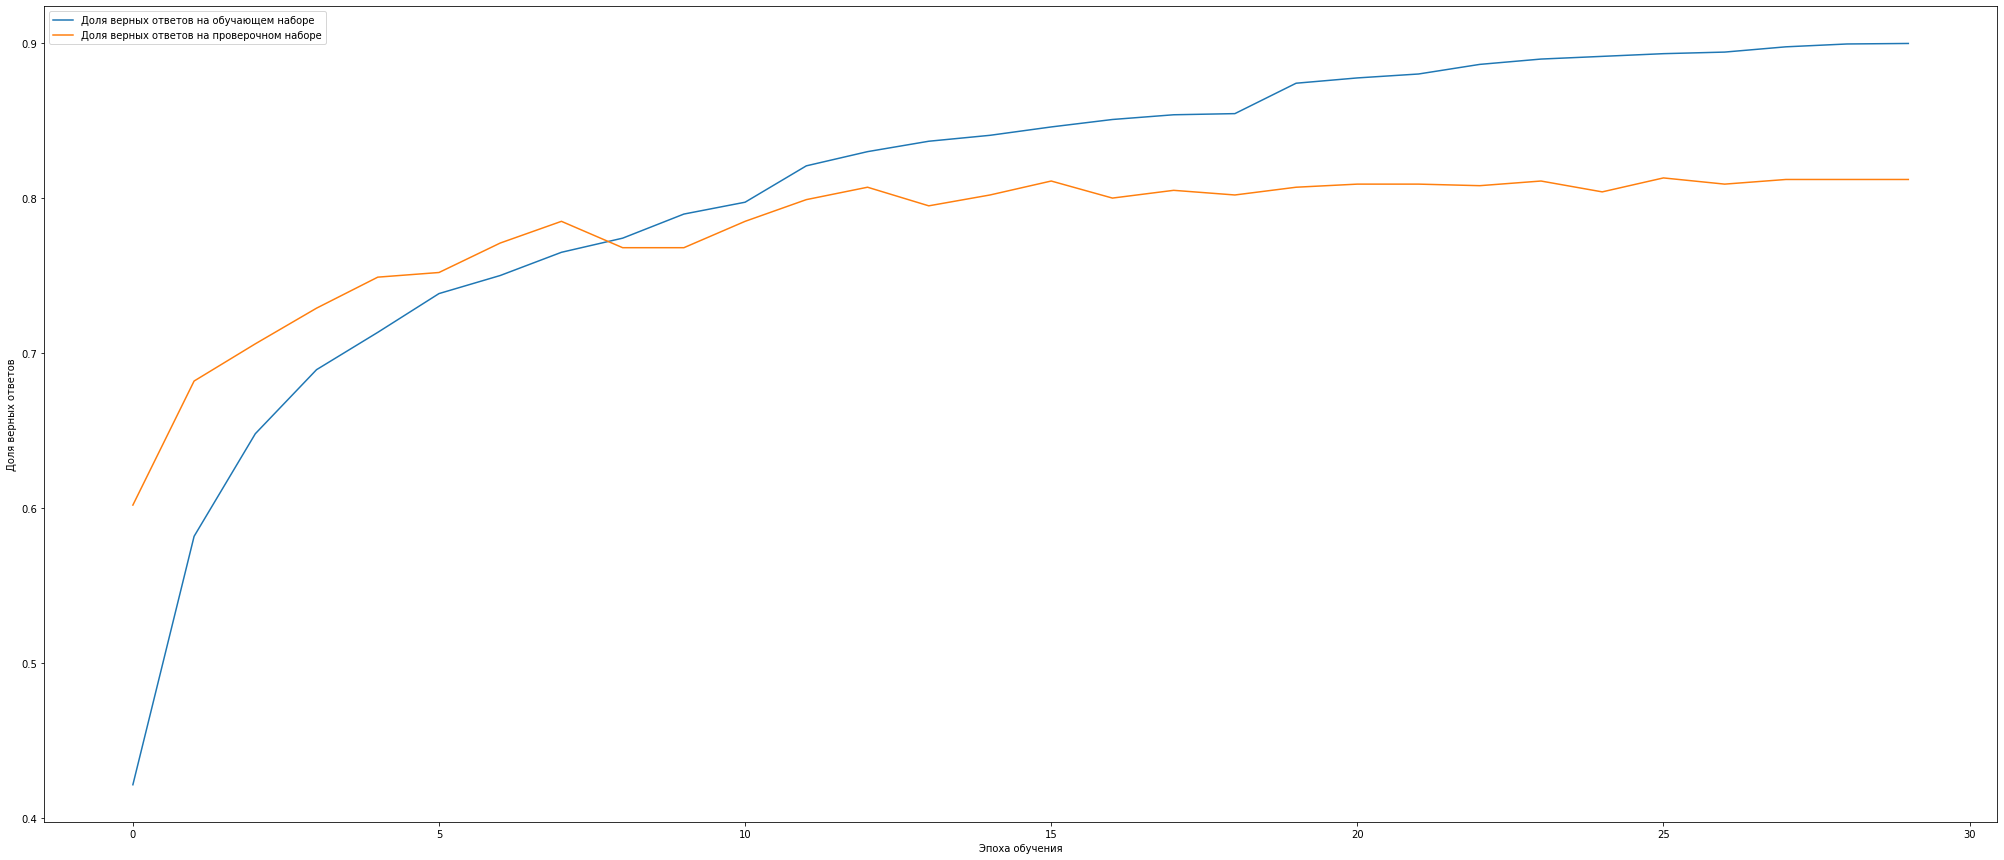

In [160]:
plt.plot(history1.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history1.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.rcParams["figure.figsize"] = (35,15)
plt.legend()
plt.show()

In [156]:
model.evaluate(X1_test, y_test, verbose=1)

32/32 [==============================] - 0s 8ms/step - loss: 0.5883 - accuracy: 0.8210


[0.5882907509803772, 0.8209999799728394]

In [158]:
pred = model.predict(X1_test, batch_size = 32)
pred = np.argmax(pred, axis=1)
answer_y_test = np.argmax(y_test, axis=1)
print(classification_report(answer_y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       103
           1       0.89      0.92      0.91        89
           2       0.84      0.69      0.76       100
           3       0.65      0.64      0.64       103
           4       0.82      0.86      0.84        90
           5       0.70      0.77      0.73        86
           6       0.85      0.88      0.86       112
           7       0.88      0.91      0.89       102
           8       0.88      0.92      0.90       106
           9       0.85      0.84      0.85       109

    accuracy                           0.82      1000
   macro avg       0.82      0.82      0.82      1000
weighted avg       0.82      0.82      0.82      1000

